In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt 
import numpy as np

import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
# minst veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
print ("Eğitim seti boyutu", x_train.shape)

Eğitim seti boyutu (60000, 28, 28)


In [39]:
 num_labels = len(np.unique(y_train))

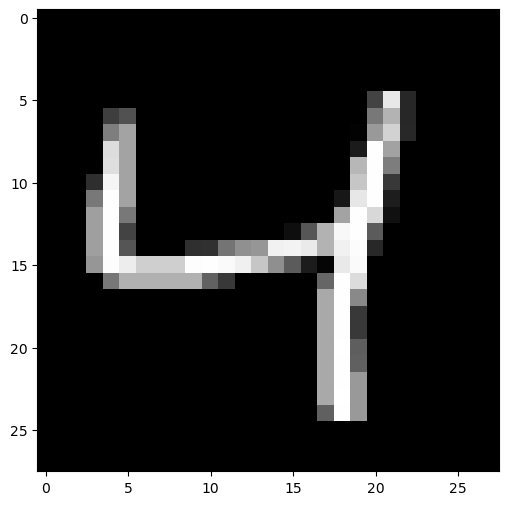

In [40]:
#veri setinden örnekler gösterilmesi

plt.figure(figsize=(6,6))
plt.imshow(x_train[2], cmap='gray');

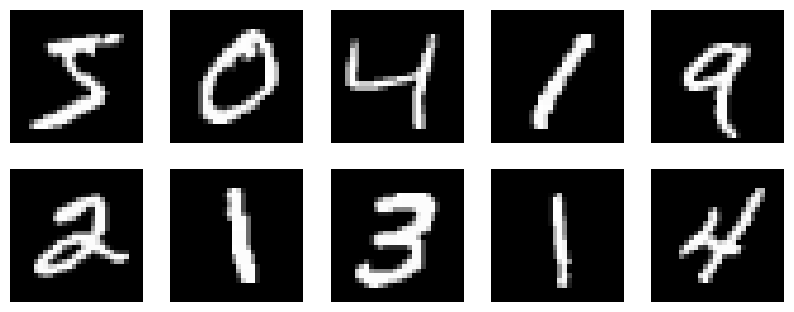

In [41]:
 plt.figure(figsize=(10,10))
    
for n  in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')

In [42]:
x_train[2].shape

(28, 28)

In [43]:
x_train[2][10,10] # ikinci resimde 10 a 10  pixellerie karşılık gelen sayı 0= siyah

0

In [44]:
x_train[2][14,10] 

49

In [45]:
x_train[2].mean()

24.799744897959183

In [46]:
x_train[2].sum()

19443

In [47]:
x_train[2][15:25, 15:20]

array([[ 91,  28,   5, 233, 250],
       [  0,   0, 102, 254, 220],
       [  0,   0, 169, 254, 137],
       [  0,   0, 169, 254,  57],
       [  0,   0, 169, 254,  57],
       [  0,   0, 169, 255,  94],
       [  0,   0, 169, 254,  96],
       [  0,   0, 169, 254, 153],
       [  0,   0, 169, 255, 153],
       [  0,   0,  96, 254, 153]], dtype=uint8)

In [48]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [49]:
def pixel_visulize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    
    threshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                     color='white' if img[x][y]<threshold else 'black')
            

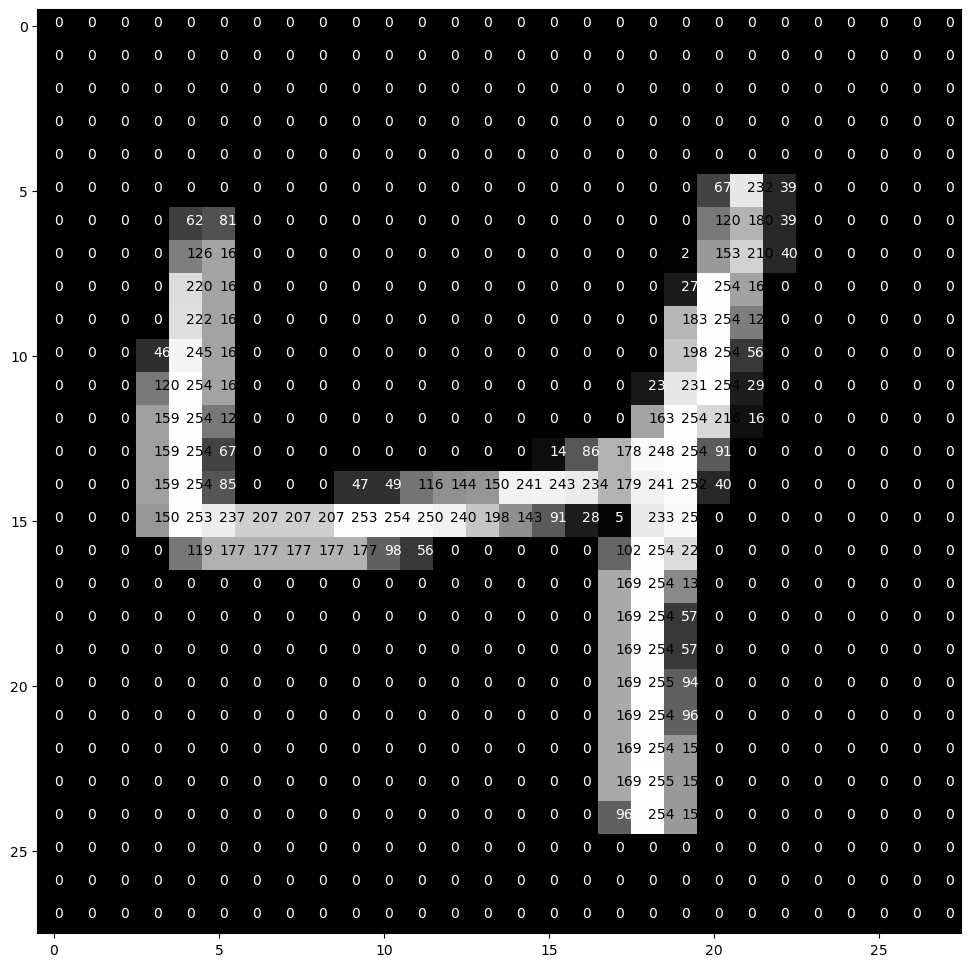

In [50]:
pixel_visulize(x_train[2])

## 3 veriyi hazırlama 
### Encoding

* hedef değişken 1 diğerleri 0 yapılır
* Önceki [0 1 2 3 4 5 6]
* sonraki [0 1 0 0 0 0 ] hedef değişken = 2

In [51]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [52]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Reshaping

In [54]:
image_size = x_train.shape[1]
image_size

28

In [55]:
print(f"x_train boyutu): {x_train.shape}")
print(f"x_test boyutu): {x_test.shape}")

x_train boyutu): (60000, 28, 28)
x_test boyutu): (10000, 28, 28)


In [56]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [57]:
print(f"x_train boyutu): {x_train.shape}")
print(f"x_test boyutu): {x_test.shape}")

x_train boyutu): (60000, 28, 28, 1)
x_test boyutu): (10000, 28, 28, 1)


### Standardization

In [58]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Modeling

In [59]:
# sinir ağı mimarisini tanımla

In [85]:
model = tf.keras.Sequential([Flatten(input_shape=(28,28,1)), # inputun şekilledindiği katman
                           Dense(units=128, activation='relu', name='layer1'), # hidden layer (units = nöron sayısı) 
                           Dense(units=num_labels, activation='softmax', name='output_layer')]) # output layer

In [86]:
model.compile(loss='categorical_crossentropy', # hata değerlendirme metriği 
             optimizer='adam', 
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]) 

In [87]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test)) # küçük veri seti olduğu için batch_size kullanmadım

Epoch 1/8
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2566 - precision_8: 0.9523 - recall_8: 0.9003 - accuracy: 0.9269 - val_loss: 0.1302 - val_precision_8: 0.9692 - val_recall_8: 0.9553 - val_accuracy: 0.9612
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - precision_8: 0.9729 - recall_8: 0.9612 - accuracy: 0.9668 - val_loss: 0.0987 - val_precision_8: 0.9747 - val_recall_8: 0.9659 - val_accuracy: 0.9701
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0759 - precision_8: 0.9808 - recall_8: 0.9738 - accuracy: 0.9768 - val_loss: 0.0868 - val_precision_8: 0.9775 - val_recall_8: 0.9714 - val_accuracy: 0.9738
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0560 - precision_8: 0.9855 - recall_8: 0.9808 - accuracy: 0.9830 - val_loss: 0.0851 - val_precision_8: 0.9765 - val_recall_8: 0.9717 - val_accuracy: 0.9738
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step 

### Evaluation

Text(0.5, 1.0, 'Eğitim ve Test Kayıp Grafiği')

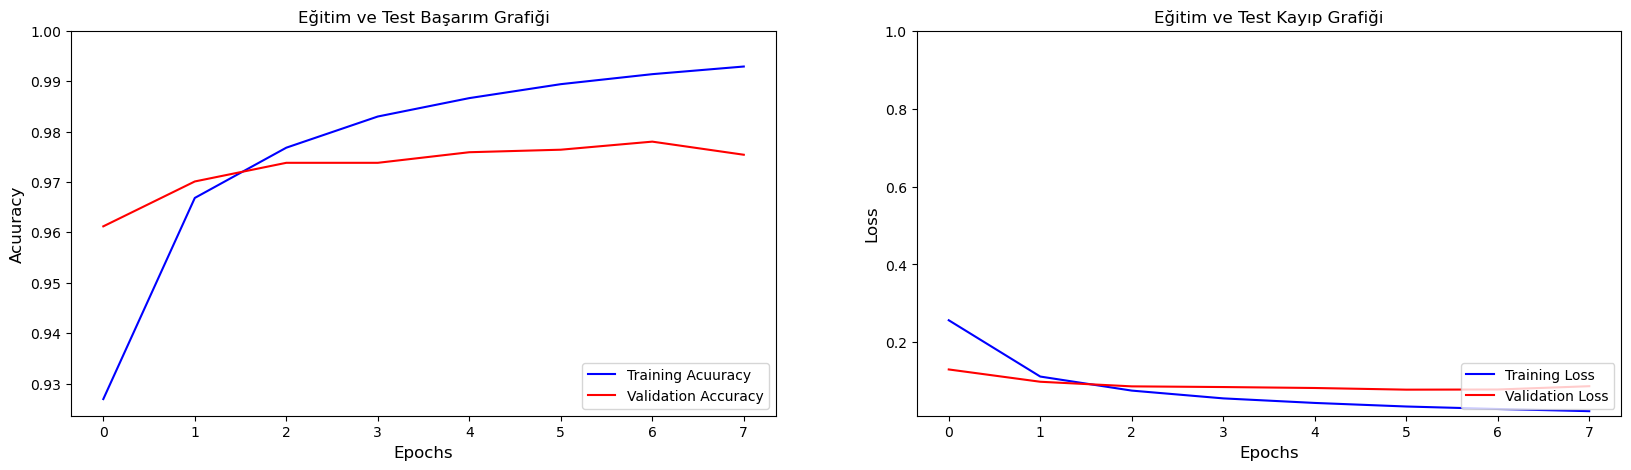

In [90]:
# Accuracy ve Loss grafikleri

        # Accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b',label='Training Acuuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Acuuracy', fontsize=12)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği')

       # Loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b',label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='lower right')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Kayıp Grafiği')

In [93]:
'''
Loss grafiğinde 2. epoch'tan itibaren Training Loss'u azalırken 
Validation Loass'u artmaya başlamış buda modelin aşırı öğrenmeye başladığını gösteriri
'''

"\nLoss grafiğinde 2. epoch'tan itibaren Training Loss'u azalırken \nValidation Loass'u artmaya başlamış buda modelin aşırı öğrenmeye başladığını gösteriri\n"

In [100]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=True)
print("Test Accuracy  :"+ str(100.0 * acc)+' %')
print("Test Loss  :"+ str(100.0 * loss)+' %')
print("Test Precision  :"+ str(100.0 * precision)+ ' %')
print("Test Recall  :" + str(100.0 * recall) + ' %')

313/313 [==============================] - 1s 4ms/step - loss: 0.0872 - precision_8: 0.9781 - recall_8: 0.9744 - accuracy: 0.9754
Test Accuracy  :97.53999710083008 %
Test Loss  :8.723587542772293 %
Test Precision  :97.81168699264526 %
Test Recall  :97.4399983882904 %


Precision, recall ve accuracy değerlerinin birbirine yakın olması, 
sınıflar arasında dengesizlik olmadığı ve modelin genel performansının iyi olduğu anlamına gelir.

* Precision (Hassasiyet): Precision, modelin pozitif olarak tahmin ettiği örneklerin gerçekten pozitif olanların yüzdesidir. Yani, modelin doğru pozitif (TP) tahminlerinin, tüm pozitif tahminlerine oranıdır.
* Recall (Duyarlılık): Recall, gerçekten pozitif olan tüm örneklerin model tarafından doğru bir şekilde tahmin edilme yüzdesidir. Yani, modelin doğru pozitif tahminlerinin, gerçek pozitiflerin tümüne oranıdır.
* Accuracy (Doğruluk): Accuracy, doğru tahmin edilen tüm örneklerin oranıdır. Yani, doğru tahmin edilenlerin (TP + TN) tüm tahminlere (TP + TN + FP + FN) oranıdır.

### Model Saving and Prediction

In [102]:
model.save('mnist_nodel.h5')

In [103]:
import random 
random = random.randint(0, x_test.shape[0])

In [104]:
random

6319

In [105]:
test_image = x_test[random]

In [107]:
y_test[random]  

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [110]:
test_data = x_test[random].reshape(1,28,28,1)

In [111]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 120ms/step


In [112]:
probability

array([[1.0000000e+00, 4.4733520e-16, 1.1423226e-09, 6.1223321e-15,
        1.4108099e-19, 7.0751315e-13, 5.0278757e-12, 2.8357397e-12,
        3.7672558e-16, 1.5254116e-11]], dtype=float32)

In [113]:
np.argmax(probability)

0

burada tahmin edilen değer 0 indexli değerdir. 0. index 1 sayısına denk geliyor 
verdiğimiz test_data örneği 1 sayısı olduğu için model doğru tahmin etti